***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 02/01/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
# %matplotlib notebook
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [2]:
Stoich = pd.read_csv("Stoich_1.csv")    #Opening/Reading the Stoichiometric input file needed to be read
Atomic = pd.read_csv("Atomic_1.csv")     #Opening/Reading the Atomic input file needed to be read
Param = pd.read_csv("Param_1.csv")[:13]     #Opening/Reading the Parameter input file needed to be read   
print("Reaction\Stoichiometric Matrix:\n",Stoich)
print("\n Atomic\Species Matrix:\n",Atomic)
print("\n Parameters Matrix:\n",Param)

Reaction\Stoichiometric Matrix:
   r\S  P_CO  P_O2  P_CO2  theta_CO  theta_O  theta_O2  theta_*
0  r1    -1     0      0         1        0         0       -1
1  r2     0    -1      0         0        0         1       -1
2  r3     0     0      0         0        2        -1       -1
3  r4     0     0      1        -1       -1         0        2

 Atomic\Species Matrix:
   A\S  CO  O2  CO2  CO*  O*  O2*  *
0   C   1   0    1    1   0    0  0
1   O   1   2    2    1   1    2  0
2   *   0   0    0    1   1    1  1

 Parameters Matrix:
    Reaction_Descrp Parameter        Values        Units
0              NaN         T  3.200000e+02            K
1              NaN         R  8.314460e+00  JK^-1mol^-1
2               CO        P1  1.000000e-08          bar
3               O2        P2  1.000000e-08          bar
4              CO2        P3  1.000000e-08          bar
5               r1       k1f  2.000000e+00            -
6              NaN       k1r  6.650000e-09            -
7           

In [3]:
#Checking the mass balance
at_mat = Atomic.iloc[0:,1:]           #The atomic matrix
err = 0                               #For counting error
for i in np.arange(len(Stoich)):    
    st_mat = Stoich.iloc[i,1:]        #The stoichiometric matrix
    res = np.dot(at_mat,st_mat)       #Performing the matrix product for every reaction i
    if any(a != 0 for a in res):      #Verifies that the matrix product returns 0s (i.e mass is balanced)
        print("Mass is not conserved in reaction %i. \n ... Check and correct the Atomic or Stoichiometric Matrices"%(i+1))
        err +=1
    elif (i == len(Stoich)-1 and err==0):    
        print("Mass is conserved.")

Mass is conserved.


In [4]:
#Extracting K values
def kextract(Param):
    #Evaluating Param file to find where the list of rate constants k starts
    for j in np.arange(len(Param.iloc[:,1])):
        if ('k1f' or 'k1') in Param.iloc[j,1]:
            kstart = j #Row in the Param file where rate constants begin
            break
        else:
            continue

    #Rate Constants:
    k = Param.iloc[kstart:,2].values #.values changes from pandas series to numpy array, allows for more optimization
    return k

In [5]:
def sol(t,u,k,Atomic,Stoich):
    #Only need to change:
   
    #------------------------------------------
    # 1 = CO ; 2 = O ; 3 = O2 ; 4 = *
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    THETA = [th1,th2,th3,th4] #Coverages being investigated
        #Partial Pressures (Assuming all same as P)
    P1 = Param.iloc[2,2]#P_CO
    P2 = Param.iloc[3,2]#P_O2
    P3 = Param.iloc[4,2]#P_CO2
    #------------------------------------------
    
    Nr = len(Stoich) #Number of rows in your your stoich matrix, i.e (Number of reactions)
    

    kf = k[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
    kr = k[1::2] #Pulling out the reverse rxn rate constants 

    D = []      #Empty Vector For holding rate of change of coverage values
    r = [None] * Nr  #Empty Vector for holding rate of a specific reaction
    
    #Calculating the rates of reactions:
    for j in np.arange(Nr):   #Looping through the reactions
        matr = [P1,P2,P3]+THETA
        fwd = []
        rvs = []
        for i in np.arange(len(Stoich.iloc[0,:])-1):
            if Stoich.iloc[j,i+1]<0: #extracting only forward relevant rate parameters  #forward rxn reactants /encounter probability
                fwd.append(matr[i]**abs(Stoich.iloc[j,i+1]))
                
            if Stoich.iloc[j,i+1]>0: #extracting only reverse relevant rate parameters  #reverse rxn reactants /encounter probability
                rvs.append(matr[i]**abs(Stoich.iloc[j,i+1]))   
                
        r[j] = (kf[j]*np.prod(fwd)) - (kr[j]*np.prod(rvs)) #Calculating the rate of reaction
    

    #Differential Equations to calculate the change in coverages
    for i in np.arange(len(Stoich.iloc[:,4:])):
        dsum=0
        for j in np.arange(Nr):
            
            dsum += Stoich.iloc[j,i+4]*r[j] #Calculating the rate of production of a species i
        
        D.append(dsum)

    return D  #   CO |  O  |  O2   |  *

def Kinetics(k,Atomic,Stoich,init,Time,Teval=None):
    t_span = (Time[0], Time[-1])
    solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF', t_eval=Teval, rtol = 1E-8,atol = 1E-8)
    solv = np.transpose(solve.y)
    #print(k)
    return solv


Running the ODE solver: (Getting the coverage profiles)

In [6]:
%%time
#initial values:
TCO_in = 0.0
TO_in = 0.0
TO2_in = 0.0
TE_in = 1 - TCO_in-TO_in-TO2_in
#init      CO | O  | O2   | *
init = [TCO_in,TO_in,TO2_in,TE_in]  #initial values

k = kextract(Param)
actual = k #To be used to compare prediction
Time =np.linspace(0, 6e6, num=1000)
t_span = (Time[0], Time[-1])
solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF', rtol = 1E-8,atol = 1E-8)#Obtaining the resulting Concentration of Coverages
solv = np.transpose(solve.y)
time_sol = np.transpose(solve.t)

print(len(time_sol))

216
CPU times: user 2.02 s, sys: 13.8 ms, total: 2.04 s
Wall time: 2.04 s


Plotting:

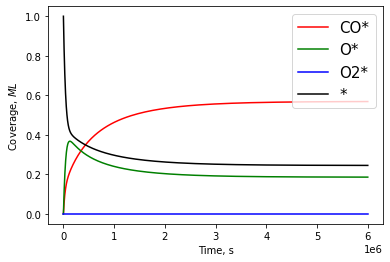

In [7]:
# %matplotlib notebook
C_CO = solv[:,0]
C_O = solv[:,1]
C_O2 = solv[:,2]
C_E = solv[:,3]

plt.figure(1)
plt.plot(time_sol, C_CO,'r-', label='CO*')        
plt.plot(time_sol, C_O,'g-', label='O*') 
plt.plot(time_sol, C_O2, 'b-', label='O2*') 
plt.plot(time_sol, C_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()

# Implementing MKM ToolKit

In [8]:
from main import *
# %matplotlib notebook

### Simulating Coverage profile with KMC Parameters

In [9]:
MKM1 = MKModel('Atomic.csv','Stoich.csv','Param.csv') #Defining the Model
print("The KMC Model's relevant Parms are inputted in Param csv:")
MKM1.k

Mass is conserved. 

The KMC Model's relevant Parms are inputted in Param csv:


array([5.81e-02, 6.65e-09, 7.69e+02, 1.15e+05, 2.60e+05, 2.14e-02,
       1.35e+00, 5.00e+02])

In [10]:
MKM1.set_initial_coverages(init=[0,0,0,1]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
MKM1.set_rxnconditions() #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax)
MKM1.set_limits_of_integration(0,25)

(0, 25)

(0.0, 0.0001)

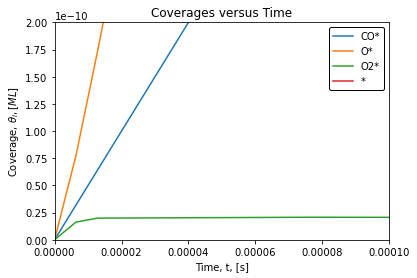

In [11]:
#plt.figure()
sola1,solta1= MKM1.solve_coverage(plot=True) #Obtains the coverages(sol) with respect to time(solt) and plots them if plot=True (Note: Additional options can be set manually - See main.py for syntax)
plt.ylim([0,2e-10])
plt.xlim([0,1e-4])

### Attempting fit with older_version

In [12]:
fit = Fitting('KMC_Coverages.csv','Atomic.csv','Stoich.csv','Param.csv',CovgDep=False) #covgdep = Allowing for coverage dependance to be considered in the fit
fit.Input

Mass is conserved. 



,Time,C_CO,C_O,C_O2,C_E
0,0.0,0.000000,0.000000,0.0,1.000000
1,0.1,0.006076,0.030490,0.0,0.963433
2,0.2,0.011013,0.055556,0.0,0.933431
3,0.3,0.014431,0.075792,0.0,0.909776
4,0.4,0.018989,0.098362,0.0,0.882650
...,...,...,...,...,...
246,24.6,0.008464,0.442763,0.0,0.548774
247,24.7,0.007541,0.442274,0.0,0.550184
248,24.8,0.008030,0.442491,0.0,0.549479
249,24.9,0.008084,0.441732,0.0,0.550184


In [13]:
time_sol = fit.Input.to_numpy()[:,0]
C_CO = fit.Input.to_numpy()[:,1]
C_O = fit.Input.to_numpy()[:,2]
C_O2 = fit.Input.to_numpy()[:,3]
C_E = fit.Input.to_numpy()[:,4]

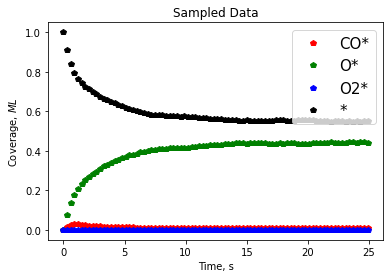

In [14]:
n = 80
Time_t = time_sol[::round(len(time_sol)/n)]
C_t_CO = C_CO[::round(len(C_CO)/n)]
C_t_O = C_O[::round(len(C_O)/n)]
C_t_O2 = C_O2[::round(len(C_O2)/n)]
C_t_E = C_E[::round(len(C_E)/n)]

plt.figure(2)
plt.plot(Time_t, C_t_CO,'rp', label='CO*')        
plt.plot(Time_t, C_t_O,'gp', label='O*') 
plt.plot(Time_t, C_t_O2, 'bp', label='O2*') 
plt.plot(Time_t, C_t_E, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

#### Normalizing

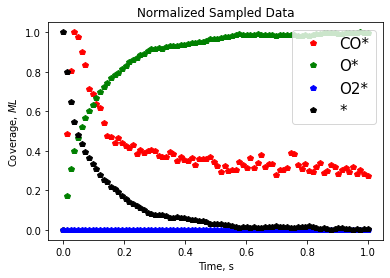

In [15]:
#Feature Scaling - Normalization
mint = min(Time_t)
maxt = max(Time_t)
Time_tn = (Time_t-mint)/(maxt-mint)
minCO = min(C_t_CO)
maxCO = max(C_t_CO)
C_t_COn = (C_t_CO-minCO)/(maxCO-minCO)
minO = min(C_t_O)
maxO = max(C_t_O)
C_t_On = (C_t_O-minO)/(maxO-minO)
####ZERO VECTOR:
minO2 = min(C_t_O2)
maxO2 = max(C_t_O2)
C_t_O2n = (C_t_O2)#-minO2)/(maxO2-minO2)
##################
minE = min(C_t_E)
maxE = max(C_t_E)
C_t_En = (C_t_E-minE)/(maxE-minE)

plt.figure(3)
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*')

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.title('Normalized Sampled Data')
plt.legend(fontsize=15, loc='best')
plt.show()

In [16]:
Guess_Param = pd.read_csv("Param.csv")[:13]     #Opening/Reading the Parameter input file needed to be read   
print("\n The Guess Parameters Matrix:\n",Guess_Param)
print("\n")


 The Guess Parameters Matrix:
    Reaction_Descrp Parameter        Values        Units
0              NaN         T  3.200000e+02            K
1              NaN         R  8.314460e+00  JK^-1mol^-1
2               CO        P1  1.000000e-08          bar
3               O2        P2  1.000000e-08          bar
4              CO2        P3  1.000000e-08          bar
5               r1       k1f  5.810000e-02            -
6              NaN       k1r  6.650000e-09            -
7               r2       k2f  7.690000e+02            -
8              NaN       k2r  1.150000e+05            -
9               r3       k3f  2.600000e+05            -
10             NaN       k3r  2.140000e-02            -
11              r4       k4f  1.350000e+00            -
12             NaN       k4r  5.000000e+02            -




In [17]:
Guessk = kextract(Guess_Param)

$$ error = \left <(c_{pred} - c_{actual})^2 \right> $$

In [18]:
C_dat = np.c_[C_t_CO,C_t_O,C_t_O2,C_t_E]
C_datn = np.c_[C_t_COn,C_t_On,C_t_O2n,C_t_En] #Normalized Concentrations

def minfunc(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    c_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    c_estim[:,0] = (c_estim[:,0]-minCO)/(maxCO-minCO)
    c_estim[:,1] = (c_estim[:,1]-minO)/(maxO-minO)
    c_estim[:,2] = (c_estim[:,2]-minO2)/(maxO2-minO2)
    c_estim[:,3] = (c_estim[:,3]-minE)/(maxE-minE)
    w = 1
    error_t = (w*(Conc[:,0] - c_estim[:,0])**2 +w*(Conc[:,1] - c_estim[:,1])**2 +w*(Conc[:,2] - c_estim[:,2])**2 +w*(Conc[:,3] - c_estim[:,3])**2)
        
    error = sum(error_t)
    return error  

### Simple Fitting Using Curve Fit - Implementing Kinetic Function

In [20]:
%%time
from numpy import inf
def curvefitfn(C_dat,Time_t,C_datn,Time_tn,k,Atomic,Stoich,plt=False):
    def test_func(x, *Guess):
        #Guess = np.asarray(Guess)
        Conc_init = C_dat[0,:]
        func = Kinetics(Guess,Atomic,Stoich,Conc_init,Time_t,Time_t)
        func[:,0] = (func[:,0]-minCO)/(maxCO-minCO)
        func[:,1] = (func[:,1]-minO)/(maxO-minO)
        func[:,2] = (func[:,2])#-minO2)/(maxO2-minO2)#Zero vector (Non-normalizable)
        func[:,3] = (func[:,3]-minE)/(maxE-minE)
        func = np.reshape(func, func.size)
        return  func 

    x_values = Time_tn
    y_values = np.reshape(C_datn, C_datn.size)
    params, params_covariance = optimize.curve_fit(test_func, x_values, y_values, method ='trf', 
                                                    bounds=(0,inf), maxfev=1e4, ftol = 1e-8, xtol=1e-8
                                                    ,p0=k)
    yfit = test_func(x_values, *params)

    c_fit=yfit.reshape(np.shape(C_datn)) 
    if plt==False:
        return c_fit,params,params_covariance
    else:
        return c_fit

CPU times: user 19 µs, sys: 27 µs, total: 46 µs
Wall time: 24.1 µs


## Using CurveFit : Varying inital k value guesses - *resizing the initial values

In [21]:
val = 2 #Percent

Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Initial guess, k_Guess: 
 [2.0400e+00 6.7830e-09 2.3562e+02 1.1730e+05 6.2526e+08 2.1828e-02
 2.9070e-06 5.1000e+02] 

final prediction, k_predict: 
 [5.29066464e+06 7.73356735e-01 1.01444957e+07 4.35456917e+06
 2.46572987e+07 7.10793678e-01 5.91139777e+00 9.88765028e+05] 

conf: [1.65575360e+06 2.10047197e-01 2.03475287e+06 3.82965774e+06
 6.76327246e+05 5.40425624e-01 1.13445838e+00 1.99906364e+06]
conf: [8.27876799e+05 3.15860446e+07 8.80845399e+03 3.33013717e+01
 1.10330709e-03 2.52535338e+01 3.98055571e+05 3.99812727e+03]
CPU times: user 9min 11s, sys: 24 s, total: 9min 35s
Wall time: 7min 54s


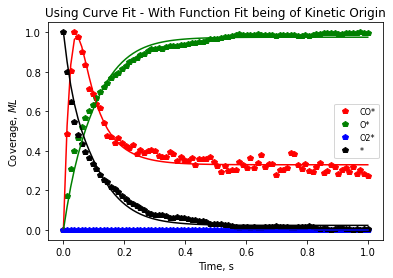

In [37]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using Curve Fit - With Function Fit being of Kinetic Origin")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
const = k * (1+(val/100))
fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,const,Atomic,Stoich,plt=False)
ax.plot(Time_tn, fit[:,0], 'r-', label='CO fit')
ax.plot(Time_tn, fit[:,1], 'g-', label='O fit')
ax.plot(Time_tn, fit[:,2], 'b-', label='O2 fit')
ax.plot(Time_tn, fit[:,3], 'k-', label='* fit')
print('Actual, k: \n',actual , '\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',params , '\n')
print('conf:', np.sqrt(np.diag(params_covariance)))
print('conf:', np.sqrt(np.diag(params_covariance))/actual)


## Using CurveFit : Varying inital k value guesses - *resizing the initial values with random numbers

Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Random resizing matirx: 
 [0.1963138893558031, 38.6352550859892, 0.041361836294300444, 0.6236927377401753, 0.7178439239127283, 1.157505534755632, 6.6434097067089715, 1.1704188153764044] 

Initial guess, k_Guess: 
 [3.92627779e-01 2.56924446e-07 9.55458418e+00 7.17246648e+04
 4.40038325e+08 2.47706184e-02 1.89337177e-05 5.85209408e+02] 

final prediction, k_predict: 
 [6.02820175e+06 5.12037472e-01 3.69712378e+07 1.46370926e+07
 6.01477255e+06 1.55759953e-01 6.77558612e+00 9.35632562e-02] 

conf: [1.73283738e+05 8.55991826e-02 1.60307105e+07 1.20839861e+06
 2.94002376e+06 2.55558973e-02 1.77692330e-01 2.66756275e+04]
CPU times: user 10min 21s, sys: 25 s, total: 10min 46s
Wall time: 9min 3s


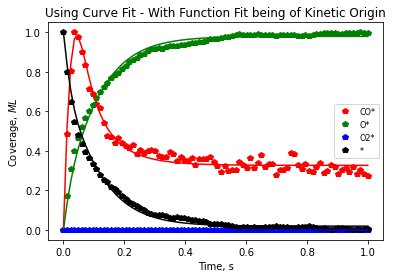

In [57]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using Curve Fit - With Function Fit being of Kinetic Origin")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
#random matrix:
ranmat = []
for i in np.arange(len(actual)):
    #ranmat.append( abs((1+(np.random.uniform(100,-100)/100))) )
    ranmat.append( 10**(np.random.uniform(-2,2)) )
const = actual * ranmat
fit,params,params_covariance = curvefitfn(C_dat,Time_t,C_datn,Time_tn,const,Atomic,Stoich,plt=False)
ax.plot(Time_tn, fit[:,0], 'r-', label='CO fit')
ax.plot(Time_tn, fit[:,1], 'g-', label='O fit')
ax.plot(Time_tn, fit[:,2], 'b-', label='O2 fit')
ax.plot(Time_tn, fit[:,3], 'k-', label='* fit')
print('Actual, k: \n',actual , '\n')
print('Random resizing matirx: \n', ranmat,'\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',params , '\n')
print('conf:', np.sqrt(np.diag(params_covariance)))

# --------------------------------------------------------------------------------------

In [37]:
from numdifftools import Jacobian, Hessian
def jacf(x):
            jac = Jacobian((lambda x: minfunc(x)),method='forward',order=3)(x).ravel()
            # enablePrint()
            # print(jac)
            # blockPrint()
            return jac

## Using L-BFGS-B: Varying inital k value guesses - *resizing the initial values

<timed exec>:21: OptimizeWarning: Unknown solver options: xatol, fatol


TypeError: jacf() takes 1 positional argument but 5 were given

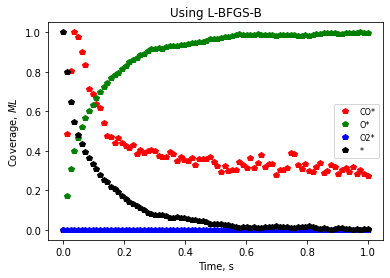

In [38]:
%%time

from ipywidgets import interact_manual,interactive
import ipywidgets as widgets


fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using L-BFGS-B")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
const = k * (1+(val/100))
#max K Guess parameters #Setting Bounds
sc = 1e2 #scaling value
mkval = const*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
result = optimize.minimize(minfunc,const, method='L-BFGS-B',tol=1e-8
                                                    ,jac= jacf
                                                    ,options={'xatol': 1e-8, 'fatol': 1e-8,'gtol': 1e-8 
                                                              ,'ftol': 1e-8,'maxfun': 1e3,'disp': False
                                                              ,'maxiter': 1e3})
k_fit = result.x
fit = Kinetics(k_fit,Atomic,Stoich,init,Time_t,Time_t)
fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
ax.plot(Time_tn, fit[:,0], 'r-')
ax.plot(Time_tn, fit[:,1], 'g-')
ax.plot(Time_tn, fit[:,2], 'b-')
ax.plot(Time_tn, fit[:,3], 'k-')
print('Actual, k: \n',actual , '\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',k_fit , '\n')


## Using L-BFGS-B: Varying inital k value guesses -*multyplying random error

Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Initial guess, k_Guess: 
 [3.98728307e+00 1.30794256e-08 3.22732748e+02 1.87822430e+05
 1.96025554e+08 2.38002317e-02 5.67641635e-06 3.60013426e+02] 

final prediction, k_predict: 
 [0.00000000e+00 1.30839158e-08 3.22732748e+04 1.87800485e+05
 1.96025554e+08 0.00000000e+00 5.67641635e-06 1.61217440e+04] 

CPU times: user 21.1 s, sys: 190 ms, total: 21.3 s
Wall time: 21 s


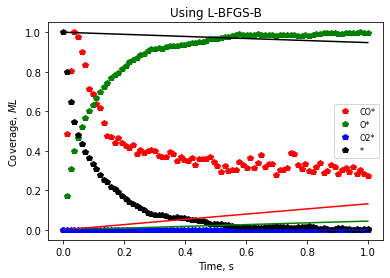

In [59]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using L-BFGS-B")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
#random matrix:
ranmat = []
for i in np.arange(len(actual)):
    ranmat.append( abs((1+(np.random.uniform(100,-100)/100))) )
const = actual * ranmat
#max K Guess parameters #Setting Bounds
sc = 1e2 #scaling value
mkval = const*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
result = optimize.minimize(minfunc,const,args=(Atomic,Stoich,Time_t,C_dat,), method="L-BFGS-B",  bounds=bounds , options={'maxcor': 100, 'ftol': 1e-15, 'gtol': 1e-15, 'eps': 1e-18, 'maxfun': 15000,'disp': False,'maxiter': 50, 'iprint': - 1, 'maxls': 35})      
k_fit = result.x
fit = Kinetics(k_fit,Atomic,Stoich,init,Time_t,Time_t)
fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')
print('Actual, k: \n',actual , '\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',k_fit , '\n')

## Using L-BFGS-B : Varying inital k value guesses - *resizing the initial values with random numbers

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


Actual, k: 
 [2.00e+00 6.65e-09 2.31e+02 1.15e+05 6.13e+08 2.14e-02 2.85e-06 5.00e+02] 

Random resizing matirx: 
 [0.012181462038579949, 1.185372708796067, 1.3094156634381926, 0.9198278616818962, 1.2494410059264416, 0.9499312259364301, 1.5869428452654084, 0.2768581525006525] 

Initial guess, k_Guess: 
 [2.43629241e-02 7.88272851e-09 3.02475018e+02 1.05780204e+05
 7.65907337e+08 2.03285282e-02 4.52278711e-06 1.38429076e+02] 

final prediction, k_predict: 
 [2.43629241e-02 7.88272851e-09 3.02475018e+02 1.05780204e+05
 7.65907337e+08 2.03285282e-02 4.52278711e-06 1.38429076e+02] 

CPU times: user 983 ms, sys: 170 ms, total: 1.15 s
Wall time: 798 ms


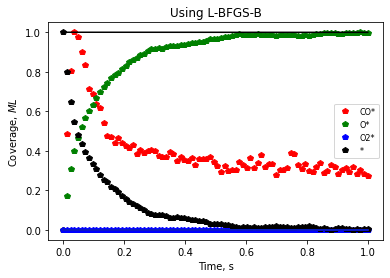

In [60]:
%%time
from ipywidgets import interact_manual,interactive
import ipywidgets as widgets

fig, ax = plt.subplots()
ax.plot(Time_tn, C_t_COn,'rp', label='CO*')        
ax.plot(Time_tn, C_t_On,'gp', label='O*') 
ax.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
ax.plot(Time_tn, C_t_En, 'kp', label='*') 
ax.set_title("Using L-BFGS-B")
ax.set_xlabel('Time, s')
ax.set_ylabel("Coverage, $ML$")
ax.legend(fontsize=8, loc='best')
#random matrix:
ranmat = []
for i in np.arange(len(actual)):
    ranmat.append( abs((1+(np.random.uniform(100,-100)/100))) )
const = actual * ranmat
#max K Guess parameters #Setting Bounds
sc = 1e2 #scaling value
mkval = const*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
result = optimize.minimize(minfunc,const,args=(Atomic,Stoich,Time_t,C_dat,), method="L-BFGS-B", jac = 'cs', bounds=bounds , options={'maxcor': 100, 'ftol': 1e-3, 'gtol': 1e-15, 'eps': 1e-18, 'maxfun': 15000,'disp': False,'maxiter': 10, 'iprint': - 1, 'maxls': 35})      
k_fit = result.x
fit = Kinetics(k_fit,Atomic,Stoich,init,Time_t,Time_t)
fit[:,0] = (fit[:,0]-minCO)/(maxCO-minCO)
fit[:,1] = (fit[:,1]-minO)/(maxO-minO)
fit[:,2] = (fit[:,2]-minO2)/(maxO2-minO2)
fit[:,3] = (fit[:,3]-minE)/(maxE-minE)
line1, = plt.plot(Time_tn, fit[:,0], 'r-')
line2, = plt.plot(Time_tn, fit[:,1], 'g-')
line3, = plt.plot(Time_tn, fit[:,2], 'b-')
line4, = plt.plot(Time_tn, fit[:,3], 'k-')
print('Actual, k: \n',actual , '\n')
print('Random resizing matirx: \n', ranmat,'\n')
print('Initial guess, k_Guess: \n', const, '\n')
print('final prediction, k_predict: \n',k_fit , '\n')

### [ B ] Using Differential Evolution [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html)

In [61]:
%%time
from scipy.optimize import curve_fit, differential_evolution    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res = differential_evolution(error_fun,
                             bounds= bounds,
                             args=(Atomic,Stoich,Time_t,C_dat),
                             seed=45, maxiter=7,disp=False, polish=True,workers=1)

CPU times: user 6min, sys: 1.02 s, total: 6min 1s
Wall time: 6min


[3.40203090e+00 6.65000000e-07 7.44867147e+04 1.50599621e+04
 1.78206952e+07 0.00000000e+00 5.41564097e+00 3.59177845e+04]


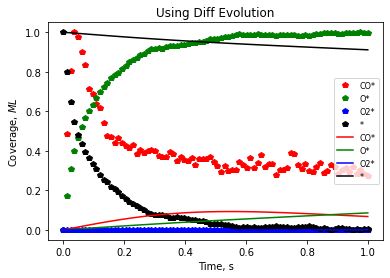

In [62]:
k_fit = res.x
print(k_fit)
c_fit = Kinetics(k_fit,Atomic,Stoich,C_dat[0,:],Time_t,Time_t)

C_fit_CO = (c_fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (c_fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (c_fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (c_fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using Diff Evolution")
plt.show()

### [ C ] Using SHGO - Simplicial homology global optimization [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html#scipy.optimize.shgo)

In [63]:
%%time
from scipy.optimize import shgo    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_c = shgo(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     iters=1, options = {'ftol': 1e-10, 'gtol': 1e-10,'maxfun': 900, 'maxiter': 3, 'disp' : True})

Splitting first generation
Starting minimization at [0.00e+00 6.65e-07 7.69e+04 0.00e+00 1.30e+07 0.00e+00 0.00e+00 2.50e+04]...
bounds in kwarg:
[[0.0, 1.4525], [4.9875e-07, 6.65e-07], [57675.0, 76900.0], [0.0, 2875000.0], [6500000.0, 19500000.0], [0.0, 0.5349999999999999], [0.0, 33.75], [12500.0, 37500.0]]
lres =      fun: 21.48097299232191
     jac: array([ 2.90870667e-05, -5.06616402e+00, -6.84261322e-05,  1.90734863e-06,
        7.15255737e-07, -2.38418579e-07, -2.14576721e-06, -1.90734863e-06])
 message: 'Optimization terminated successfully'
    nfev: 83
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 6.65000000e-07, 7.69000000e+04, 7.48319313e-06,
       1.30000000e+07, 2.55394865e-05, 3.02881984e+00, 2.49999996e+04])
Starting minimization at [0.00e+00 6.65e-07 7.69e+04 0.00e+00 2.60e+07 0.00e+00 6.75e+01 5.00e+04]...
bounds in kwarg:
[[0.0, 1.4525], [4.9875e-07, 6.65e-07], [57675.0, 76900.0], [0.0, 2875000.0], [19500000.0, 26000000.0], [0.0,

In [64]:
def CI95(fvec, jac):
    #Returns the 95% confidence interval on parameters
    
    rss = np.sum(fvec**2) # residual sum of squares
    
    n, p = jac.shape     # number of data points and parameters
   
    nmp = n - p          # the statistical degrees of freedom
    
    ssq = rss / nmp      # mean residual error
    
    J = np.matrix(jac)   # the Jacobian
    
    c = inv(J.T*J)       # covariance matrix
    
    pcov = c * ssq       # variance-covariance matrix.
    # Diagonal terms provide error estimate based on uncorrelated parameters.
    
    err = np.sqrt(np.diag(np.abs(pcov))) * 1.96  # std. dev. x 1.96 -> 95% conf
    # Here err is the full 95% area under the normal distribution curve. 
    return err

[0.00000000e+00 6.65000000e-07 7.69000000e+04 7.48319313e-06
 1.30000000e+07 2.55394865e-05 3.02881984e+00 2.49999996e+04]


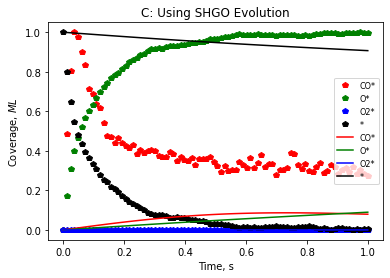

In [65]:
k_fit_c = res_c.x
print(k_fit_c)
c_fit = Kinetics(k_fit_c,Atomic,Stoich,C_dat[0,:],Time_t,Time_t)

C_fit_CO = (c_fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (c_fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (c_fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (c_fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("C: Using SHGO Evolution")
plt.show()

### [ D ] Using Dual Annealing - Combination of CSA (Classical Simulated Annealing) and FSA (Fast Simulated Annealing)  [Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html?highlight=dual_annealing#scipy.optimize.dual_annealing)

In [66]:
%%time
from scipy.optimize import dual_annealing    

def error_fun(Guessk,Atomic,Stoich,Time,Conc):
    Conc_init = Conc[0,:]
    y_estim = Kinetics(Guessk,Atomic,Stoich,Conc_init,Time,Time)
    y_estim[:,0] = (y_estim[:,0]-minCO)/(maxCO-minCO)
    y_estim[:,1] = (y_estim[:,1]-minO)/(maxO-minO)
    y_estim[:,2] = (y_estim[:,2]-minO2)/(maxO2-minO2)
    y_estim[:,3] = (y_estim[:,3]-minE)/(maxE-minE)    
    y_data = Conc
    return np.sum((y_data - y_estim) ** 2)

#max K Guess parameters
sc = 1e2 #scaling value
mkval = Guessk*sc #max kvals
bounds = np.empty([len(mkval),2])
for i in range(len(mkval)):
    bounds[i] = (0,mkval[i])
    
res_d = dual_annealing(error_fun,bounds= bounds,
                     args=(Atomic,Stoich,Time_t,C_dat),
                     maxiter=10, maxfun = 5000, seed=45)

CPU times: user 2min 35s, sys: 517 ms, total: 2min 36s
Wall time: 2min 35s


[3.54995745e+00 6.65000000e-07 7.28089995e+04 1.78518234e+06
 2.44566680e+07 0.00000000e+00 1.74900469e+00 1.87529712e+04]


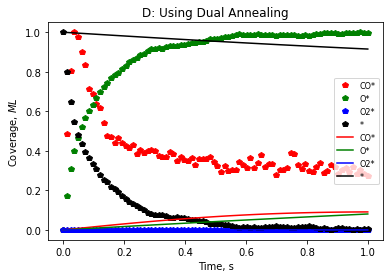

In [67]:
k_fit_d = res_d.x
print(k_fit_d)
c_fit = Kinetics(k_fit_d,Atomic,Stoich,C_dat[0,:],Time_t,Time_t)

C_fit_CO = (c_fit[:,0]-minCO)/(maxCO-minCO)
C_fit_O = (c_fit[:,1]-minO)/(maxO-minO)
C_fit_O2 = (c_fit[:,2]-minO2)/(maxO2-minO2)
C_fit_E = (c_fit[:,3]-minE)/(maxE-minE)

plt.figure()
#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 


plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("D: Using Dual Annealing")
plt.show()

### Simple Fitting Using SPLINES

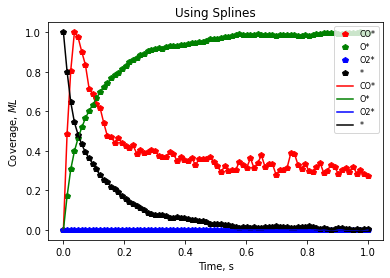

CPU times: user 180 ms, sys: 113 ms, total: 293 ms
Wall time: 99.1 ms


In [68]:
%%time
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
#fitting spline - loop
x_values = Time_tn
C_fit_in = np.empty([len(x_values),4])
for i in np.arange(4):
    a = UnivariateSpline(x_values, C_datn[:,i], k=5)
    a.set_smoothing_factor(1e-5)
    C_fit_in[:,i] = a(x_values)
    
    
C_fit_CO = C_fit_in[:,0]
C_fit_O = C_fit_in[:,1]
C_fit_O2 = C_fit_in[:,2]
C_fit_E = C_fit_in[:,3]  

plt.figure()

#Replotting the extracted dataset
plt.plot(Time_tn, C_t_COn,'rp', label='CO*')        
plt.plot(Time_tn, C_t_On,'gp', label='O*') 
plt.plot(Time_tn, C_t_O2n, 'bp', label='O2*') 
plt.plot(Time_tn, C_t_En, 'kp', label='*') 

#Plotting the fit

plt.plot(Time_tn, C_fit_CO,'r-', label='CO*')        
plt.plot(Time_tn, C_fit_O,'g-', label='O*') 
plt.plot(Time_tn, C_fit_O2, 'b-', label='O2*') 
plt.plot(Time_tn, C_fit_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=8, loc='best')
plt.title("Using Splines")
plt.show()